In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# Exercise 1: Grouping (users)
# Load the 'users' DataFrame
# Load the 'users' DataFrame
users = pd.read_csv('users.csv')

# Display the column names and the first few rows to inspect
print("Columns in 'users' DataFrame:")
print(users.columns)
print("\nFirst few rows of 'users' DataFrame:")
print(users.head())

# Check for required columns
if 'occupation' in users.columns and 'gender' in users.columns and 'age' in users.columns:
    # 1. Determine the male ratio per occupation and sort in descending order
    occupation_gender_counts = users.groupby('occupation')['gender'].value_counts().unstack(fill_value=0)
    occupation_gender_counts['male_ratio'] = occupation_gender_counts['male'] / occupation_gender_counts.sum(axis=1)
    occupation_gender_counts_sorted = occupation_gender_counts.sort_values(by='male_ratio', ascending=False)
    print("\nMale ratio per occupation sorted in descending order:")
    print(occupation_gender_counts_sorted[['male_ratio']])
    
    # 2. Calculate the minimum and maximum ages per occupation
    age_min_max = users.groupby('occupation')['age'].agg(['min', 'max'])
    print("\nMinimum and maximum ages per occupation:")
    print(age_min_max)
    
    # 3. Calculate the mean age for each combination of occupation and gender
    mean_age_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean().unstack()
    print("\nMean age per occupation and gender:")
    print(mean_age_occupation_gender)
    
    # 4. Present the percentage of women and men in each occupation
    occupation_gender_percent = users.groupby('occupation')['gender'].value_counts(normalize=True).unstack(fill_value=0) * 100
    print("\nPercentage of women and men in each occupation:")
    print(occupation_gender_percent)
else:
    print("Required columns are missing in 'users' DataFrame.")

Columns in 'users' DataFrame:
Index(['user_id|age|gender|occupation|zip_code'], dtype='object')

First few rows of 'users' DataFrame:
  user_id|age|gender|occupation|zip_code
0                1|24|M|technician|85711
1                     2|53|F|other|94043
2                    3|23|M|writer|32067
3                4|24|M|technician|43537
4                     5|33|F|other|15213
Required columns are missing in 'users' DataFrame.


In [10]:
# Exercise 2: Merge (all_data, all_data_col, data3)
# Create DataFrames for the exercise
data1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})

data2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank']
})

data3 = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6],
    'Score': [85, 92, 78, 88, 90, 79]
})

# Print 'data3'
print("Data3:")
print(data3)

# Create 'all_data' and 'all_data_col' for merging
all_data = pd.concat([data1, data2], axis=0, ignore_index=True)
all_data_col = pd.concat([data1, data2], axis=1)

# Merge 'all_data' and 'data3' on 'ID'
merged_all_data_data3 = pd.merge(all_data, data3, on='ID', how='inner')

# Merge 'data1' and 'data2' on 'ID' (only matching rows)
merged_data1_data2_inner = pd.merge(data1, data2, on='ID', how='inner', suffixes=('_data1', '_data2'))

# Merge all values from 'data1' and 'data2', keeping records from both sides
merged_data1_data2_outer = pd.merge(data1, data2, on='ID', how='outer', suffixes=('_data1', '_data2'))

# Display the results
print("\nMerged 'all_data' and 'data3':")
print(merged_all_data_data3)

print("\nMerged 'data1' and 'data2' (inner join):")
print(merged_data1_data2_inner)

print("\nMerged 'data1' and 'data2' (outer join):")
print(merged_data1_data2_outer)


Data3:
   ID  Score
0   1     85
1   2     92
2   3     78
3   4     88
4   5     90
5   6     79

Merged 'all_data' and 'data3':
   ID     Name  Score
0   1    Alice     85
1   2      Bob     92
2   3  Charlie     78
3   4    David     88
4   3  Charlie     78
5   4    David     88
6   5      Eve     90
7   6    Frank     79

Merged 'data1' and 'data2' (inner join):
   ID Name_data1 Name_data2
0   3    Charlie    Charlie
1   4      David      David

Merged 'data1' and 'data2' (outer join):
   ID Name_data1 Name_data2
0   1      Alice        NaN
1   2        Bob        NaN
2   3    Charlie    Charlie
3   4      David      David
4   5        NaN        Eve
5   6        NaN      Frank


In [12]:
# Exercise 3: Deleting (iris)
# Load the iris DataFrame
iris = pd.read_csv('iris.csv')

# Print column names to verify
print("Columns in the iris DataFrame:")
print(iris.columns)

# Check the first few rows
print("\nFirst few rows of the iris DataFrame:")
print(iris.head())

# Check if 'class' column exists and drop it
if 'class' in iris.columns:
    iris.drop(columns=['class'], inplace=True)
else:
    print("'class' column not found in DataFrame")

# Optional: Set the first three rows to NaN
import numpy as np
iris.iloc[:3] = np.nan

print("\nDataFrame after modifications:")
print(iris.head())

Columns in the iris DataFrame:
Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

First few rows of the iris DataFrame:
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
'class' column not found in DataFrame

DataFrame after modifications:
   5.1  3.5  1.4  0.2  Iris-setosa
0  NaN  NaN  NaN  NaN          NaN
1  NaN  NaN  NaN  NaN          NaN
2  NaN  NaN  NaN  NaN          NaN
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [13]:
# Exercise 4: Creating Series and DataFrames (pokemon)
# Step 1: Create the DataFrame
data = {
    'evolution': ['Ivysaur', 'Charmeleon', 'Wartortle', 'Metapod'],
    'hp': [45, 39, 44, 45],
    'name': ['Bulbasaur', 'Charmander', 'Squirtle', 'Caterpie'],
    'pokedex': ['yes', 'no', 'yes', 'no'],
    'type': ['grass', 'fire', 'water', 'bug']
}

pokemon = pd.DataFrame(data)

# Display the DataFrame
print("Original DataFrame:")
print(pokemon)

# Step 2: Add a new column 'place' with default value 'park'
pokemon['place'] = 'park'

# Display the updated DataFrame
print("\nDataFrame with 'place' column:")
print(pokemon)

# Step 3: Display the data type of each column
print("\nData types of each column:")
print(pokemon.dtypes)

Original DataFrame:
    evolution  hp        name pokedex   type
0     Ivysaur  45   Bulbasaur     yes  grass
1  Charmeleon  39  Charmander      no   fire
2   Wartortle  44    Squirtle     yes  water
3     Metapod  45    Caterpie      no    bug

DataFrame with 'place' column:
    evolution  hp        name pokedex   type place
0     Ivysaur  45   Bulbasaur     yes  grass  park
1  Charmeleon  39  Charmander      no   fire  park
2   Wartortle  44    Squirtle     yes  water  park
3     Metapod  45    Caterpie      no    bug  park

Data types of each column:
evolution    object
hp            int64
name         object
pokedex      object
type         object
place        object
dtype: object


In [14]:
# Exercise 5: Descriptive Statistics (baby_names)


# Load the DataFrame (adjust the path to where your 'baby_names.csv' file is located)
baby_names = pd.read_csv('baby_names.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Initial DataFrame:")
print(baby_names.head())

# Step 1: Count the number of unique genders
gender_counts = baby_names['Gender'].nunique()
print("\nNumber of unique genders:")
print(gender_counts)

# Step 2: Group the data by 'Year' and 'Gender' and find the sum of 'Count' for each group
grouped_sum = baby_names.groupby(['Year', 'Gender'])['Count'].sum().reset_index()
print("\nSum of 'Count' for each 'Year' and 'Gender':")
print(grouped_sum)

# Step 3: Determine the names with most occurrences
name_occurrences = baby_names.groupby('Name')['Count'].sum().sort_values(ascending=False)
most_occurrences = name_occurrences.head(10)  # Top 10 names with most occurrences
print("\nTop 10 names with the most occurrences:")
print(most_occurrences)

# Step 4: Determine the median name occurrence in the dataset
median_occurrence = baby_names['Count'].median()
print("\nMedian name occurrence in the dataset:")
print(median_occurrence)

# Step 5: Determine the distribution of male and female born count by states
# Assuming the dataset has a 'State' column to analyze the distribution
# Replace 'State' with the actual column name if different
distribution_by_state = baby_names.groupby(['State', 'Gender'])['Count'].sum().unstack().fillna(0)
print("\nDistribution of male and female born count by states:")
print(distribution_by_state)


Initial DataFrame:
   Unnamed: 0     Id     Name    Year Gender State  Count
0       11349  11350     Emma  2004.0      F    AK   62.0
1       11350  11351  Madison  2004.0      F    AK   48.0
2       11351  11352   Hannah  2004.0      F    AK   46.0
3       11352  11353    Grace  2004.0      F    AK   44.0
4       11353  11354    Emily  2004.0      F    AK   41.0

Number of unique genders:
2

Sum of 'Count' for each 'Year' and 'Gender':
      Year Gender     Count
0   2004.0      F  491912.0
1   2004.0      M  549587.0
2   2005.0      F  498941.0
3   2005.0      M  556847.0
4   2006.0      F  513682.0
5   2006.0      M  575705.0
6   2007.0      F  515320.0
7   2007.0      M  577729.0
8   2008.0      F  500077.0
9   2008.0      M  561093.0
10  2009.0      F  476663.0
11  2009.0      M  534638.0
12  2010.0      F  458291.0
13  2010.0      M  514000.0
14  2011.0      F  452511.0
15  2011.0      M  507384.0
16  2012.0      F  451839.0
17  2012.0      M  505038.0
18  2013.0      F  436949.

Weather Data:
        Date  Temperature  Humidity  Wind_Speed
0 2021-01-01           30        80           5
1 2021-01-02           31        75           6
2 2021-01-03           29        70           7
3 2021-01-04           32        85           8
4 2021-01-05           33        90           9
5 2021-01-06           34        80           4
6 2021-01-07           28        75          10
7 2021-01-08           27        60           5
8 2021-01-09           25        65           6
9 2021-01-10           35        70           7

The frequency of the dataset is D.

Weather Data with 'Date' as Index:
            Temperature  Humidity  Wind_Speed
Date                                         
2021-01-01           30        80           5
2021-01-02           31        75           6
2021-01-03           29        70           7
2021-01-04           32        85           8
2021-01-05           33        90           9
2021-01-06           34        80           4
2021-01-07        

C:\Users\DaveN\AppData\Local\Temp\ipykernel_22244\2560220308.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2014-01-01', end='2016-12-31', freq='M'),
C:\Users\DaveN\AppData\Local\Temp\ipykernel_22244\2560220308.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = investor_data.resample('M').sum()


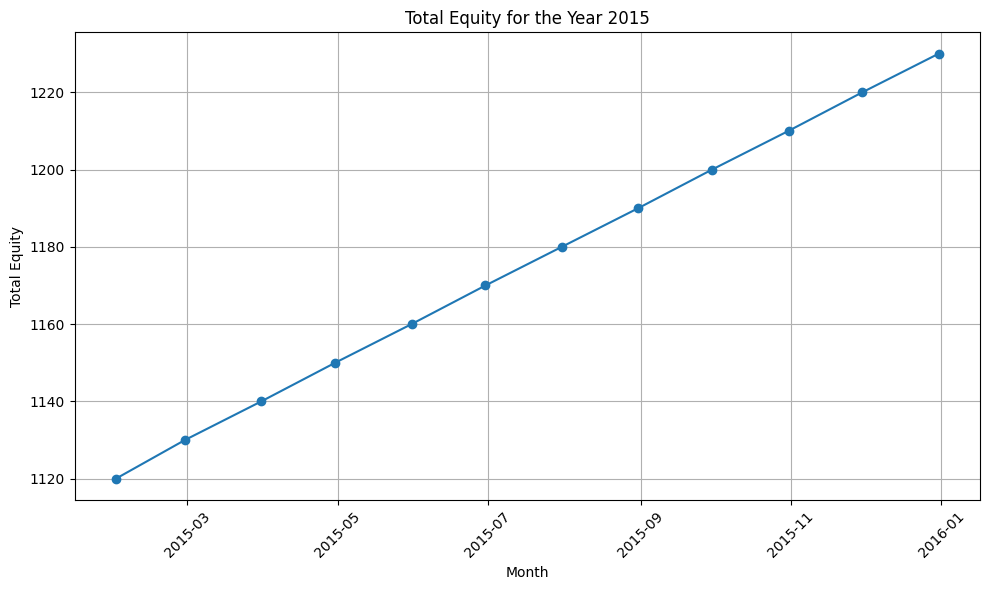

In [18]:
# Exercise 6: Handling Time Series Data (investor_data)
# Define data
temperature = [30, 31, 29, 32, 33, 34, 28, 27, 25, 35]
humidity = [80, 75, 70, 85, 90, 80, 75, 60, 65, 70]
wind_speed = [5, 6, 7, 8, 9, 4, 10, 5, 6, 7]

# Create the Date column with dates between 2021-01-01 and 2021-01-10, Day frequency
date_rng = pd.date_range(start='2021-01-01', end='2021-01-10', freq='D')

# Create the DataFrame
weather_data = pd.DataFrame({
    'Date': date_rng,
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind_Speed': wind_speed
})

# Display the DataFrame
print("Weather Data:")
print(weather_data)

# Determine the frequency of the dataset
frequency = pd.infer_freq(weather_data['Date'])
print(f"\nThe frequency of the dataset is {frequency}.")

# Set 'Date' as the index
weather_data.set_index('Date', inplace=True)

# Display the modified DataFrame
print("\nWeather Data with 'Date' as Index:")
print(weather_data)

# Exercise 6: Handling Time Series Data (Investor Data)

# Sample investor_data for demonstration
# Replace this with actual data loading if you have an external CSV file
investor_data = pd.DataFrame({
    'Date': pd.date_range(start='2014-01-01', end='2016-12-31', freq='M'),
    'Total Equity': [1000 + i * 10 for i in range(36)]  # Example data
})

# Step 1: Convert 'Date' column to datetime format
investor_data['Date'] = pd.to_datetime(investor_data['Date'])

# Step 2: Set 'Date' as the index
investor_data.set_index('Date', inplace=True)

# Step 3: Resample to monthly frequency (if necessary)
monthly_data = investor_data.resample('M').sum()

# Step 4: Find data for the year 2015
data_2015 = monthly_data.loc['2015']

# Step 5: Find the total sum of 'Total Equity' for 2015
total_equity_2015 = data_2015['Total Equity'].sum()
print(f"\nTotal sum of 'Total Equity' for 2015: {total_equity_2015}")

# Step 6: Plot 'Total Equity' for the year 2015
plt.figure(figsize=(10, 6))
plt.plot(data_2015.index, data_2015['Total Equity'], marker='o', linestyle='-')
plt.title('Total Equity for the Year 2015')
plt.xlabel('Month')
plt.ylabel('Total Equity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()